In [43]:
import music_graph as mg    # contains all necessary functions, data and dependencies

from music_graph import artist_dictionary
from music_graph import tags_dictionary
from music_graph import filtered_tags_dictionary
from music_graph import ratings
from music_graph import build_net
from music_graph import layer_graphs
from music_graph import new_centrality
from music_graph import spotify_rankings

import configparser
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter

# Spotify client id & secret for API access

config = configparser.ConfigParser()
config.read('spotify.ini')

client_id = config['spotify']['client_id']
client_secret = config['spotify']['client_secret']

In [44]:
# manually pulling random user-created playlists from spotify

playlists = {
'4C9mWYjVobPsfFXesGxYNf':'all classic hits', ### $$$
#'5TF1ki4BzMFfotw57juFTY':'coffee shop mix',
'3pM6OEFeTo4L1yd4eRltjL':'2004 hits', ### $$$
'73gFKr9Moh1T3jXM8TVSdC':'80s summer mix',
'17xTDziQjqAZANvg6C6FlX':'songs from your old ipod',
'6j3URIMhpf62LXpDcbi98b':'rap playlists',
#'1DcX9eK1MaPlwwBIsEfnBX':'country playlist to end all playlists',
#'5VhEpH7stoZiX4v8gIb77P':'playlists',
'37i9dQZF1DWXRqgorJj26U':'rock classics', ### $$$
'37i9dQZF1DWWJOmJ7nRx0C':'rock hard',  ### $$$
'37i9dQZF1DWWRktbhJiuqL':'pure rock n roll', ### $$$
'37i9dQZF1DX5W4wuxak2hE':'power pop', ###
'7Jfcy1H82lsTIzhpL4MZXu':'punk playlist', ### $$$
'07jaITMGGL6QYmT8yZVxQt':'metal playlist'
}  

In [45]:
"""
Request tracks from a playlist in Spotify
Then pull artist out of the track container.
"""
url = 'https://open.spotify.com/playlist'
sp = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id, client_secret))

playlistid = '7Jfcy1H82lsTIzhpL4MZXu'
playlist_name = playlists[playlistid]

# playlists with more than 100 artists will require two requests
playlist1 = sp.playlist_tracks(playlistid, offset = 0, limit = 100) # get the first 100 tracks
playlist2 = sp.playlist_tracks(playlistid, offset = 100, limit = 100) # get the next 100 tracks

artists = []

for index, item in enumerate(playlist1['items']):
    artists.append(item['track']['album']['artists'][0]['name'])
    
for index, item in enumerate(playlist2['items']):
    artists.append(item['track']['album']['artists'][0]['name'])
    
artists = [i.lower() for i in artists]

num_artists = len(set(artists))      # number of unique artists in the playlist

# a quick check on the number of artists to make sure we retrieved all artists
print(len(set(artists)), ' unique artists')
print(len((artists)), ' total artists') 

180  unique artists
200  total artists


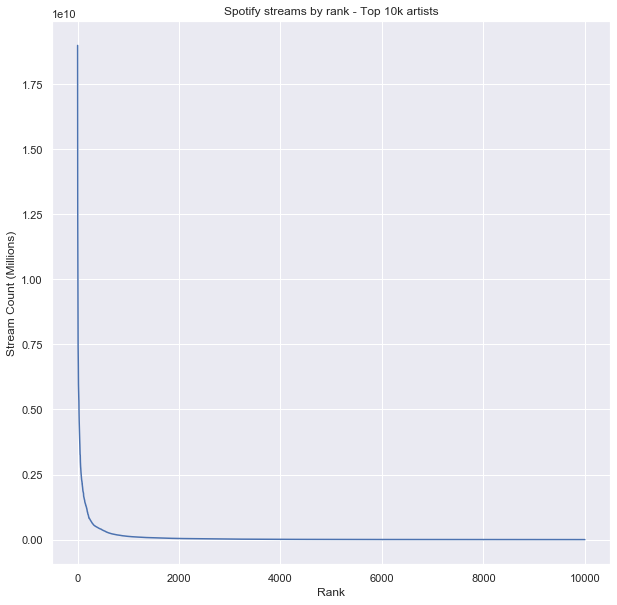

In [46]:
#Spotify stream counts for the top 10k artists
plt.figure(figsize = (10,10))
sns.lineplot(x = 'Pos',
            y = 'streams',
            data = spotify_rankings)
plt.ylabel('Stream Count (Millions)')
plt.xlabel('Rank')
plt.title('Spotify streams by rank - Top 10k artists')
plt.show()

In [47]:
ratings.head()

,artist_id,artist_name,mean_rating,median_rating,yahoo_rating_count,mean_rank,count_rank,median_rank,artist
0,1099349,Zane,76.334648,100.0,2029.0,1830,5038,1,zane
1,1026379,T-Boz,87.134254,100.0,1810.0,49,5369,2,t-boz
2,1098197,The Hamptons,81.950503,100.0,1293.0,495,6240,3,the hamptons
3,1034812,Imajin,83.230596,100.0,889.0,322,7214,4,imajin
4,1097148,Mr. C The Slide Man,85.942904,100.0,613.0,105,7843,5,mr. c the slide man


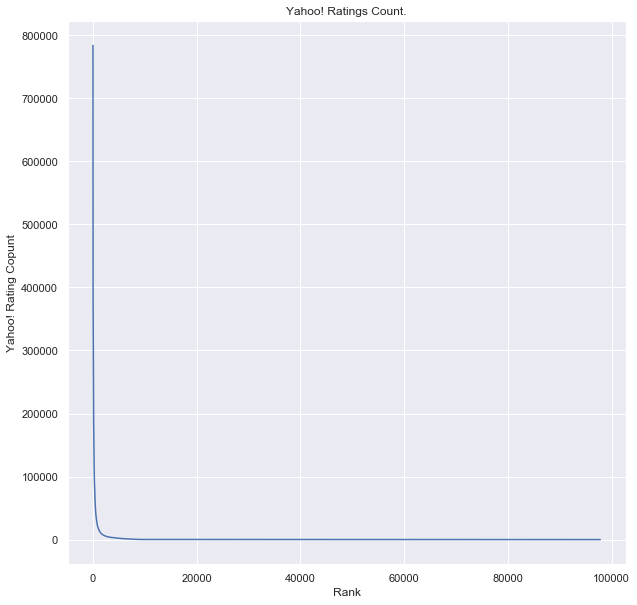

In [48]:
# distribution of Yahoo! artist ratings
plt.figure(figsize = (10,10))
sns.lineplot(x = 'count_rank',
            y = 'yahoo_rating_count',
            data = ratings)
plt.ylabel('Yahoo! Rating Copunt')
plt.xlabel('Rank')
plt.title('Yahoo! Ratings Count.')
plt.show()

In [49]:
playlist_artists = ratings[ratings['artist'].isin(artists)]   #Yahoo! ratings data
playlist_artists.head()

,artist_id,artist_name,mean_rating,median_rating,yahoo_rating_count,mean_rank,count_rank,median_rank,artist
1370,1028125,Various Artists,63.223988,90.0,692.0,9168,7671,1371,various artists
1454,1003444,The Boys,79.454082,90.0,392.0,982,8368,1455,the boys
1462,1032630,Death,77.863517,90.0,381.0,1391,8399,1463,death
1802,1022172,Reagan Youth,73.658385,90.0,161.0,2906,9692,1803,reagan youth
2146,1036788,X,74.701031,90.0,97.0,2473,10756,2147,x


In [50]:
# select 10 random artists a build a multigraph
rand_artist_count = 0
rand_artists = []
while rand_artist_count < 10:
    rand = np.random.randint(0,num_artists,1)
    rand = rand[0]
    if artists[rand] not in rand_artists: #and artists[rand] not in ['mumford & sons','bløf','lil jon & the east side boyz']:
        rand_artists.append(artists[rand].lower())
        rand_artist_count +=1

multigraph = layer_graphs(rand_artists, add_tags = True, size = 75) # node count of each graph

scores = new_centrality(multigraph)

scores.sort_values(by = ['page_rank'],
                   ascending = False,
                   inplace = True)
topN = list(scores['artist'].iloc[:num_artists])


#graph_artists = spotify_rankings[spotify_rankings['Artist'].isin(topN)]

graph_artists = ratings[ratings['artist'].isin(topN)]

reagan youth  not in artist_dictionary
u.k. subs  not in artist_dictionary


In [51]:
graph_artists.head()

,artist_id,artist_name,mean_rating,median_rating,yahoo_rating_count,mean_rank,count_rank,median_rank,artist
1027,1022226,Red Hot Chili Peppers,65.388488,90.0,573392.0,7579,3,1028,red hot chili peppers
1046,1019857,The Offspring,65.131460,90.0,360909.0,7716,35,1047,the offspring
1085,1020778,Pearl Jam,67.899858,90.0,196980.0,5946,123,1086,pearl jam
1370,1028125,Various Artists,63.223988,90.0,692.0,9168,7671,1371,various artists
1751,1041692,Common Rider,75.406780,90.0,177.0,2197,9507,1752,common rider


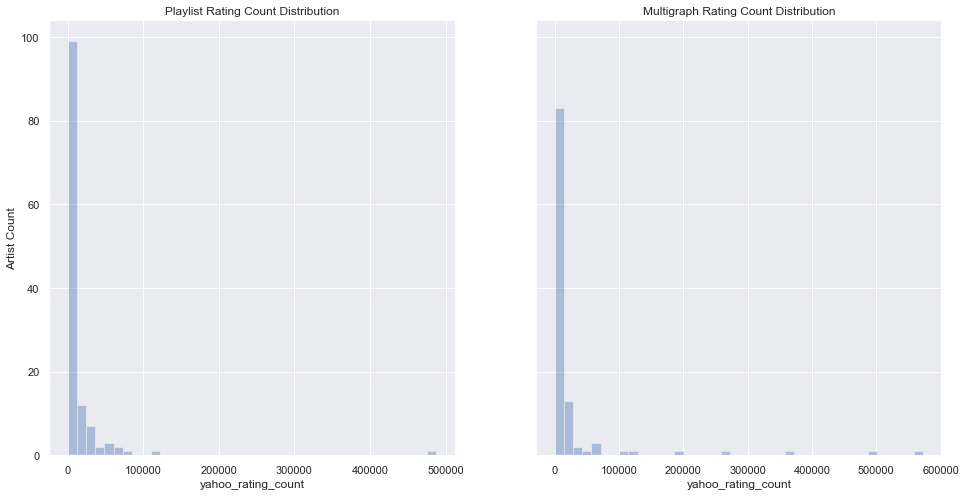

In [52]:
# compare the Yahoo! artist rating distribution of the artists in the playlist vs. the artists in the graph.

fig, (ax1, ax2) = plt.subplots(1,2, sharey = 'all', figsize = (16,8))
sns.distplot(playlist_artists['yahoo_rating_count'], kde = False,bins = 40, ax = ax1)
sns.distplot(graph_artists['yahoo_rating_count'],kde = False, bins = 40, ax = ax2)
ax1.set(title = 'Playlist Rating Count Distribution',
       ylabel = 'Artist Count')
ax2.set(title = 'Multigraph Rating Count Distribution')
plt.show()

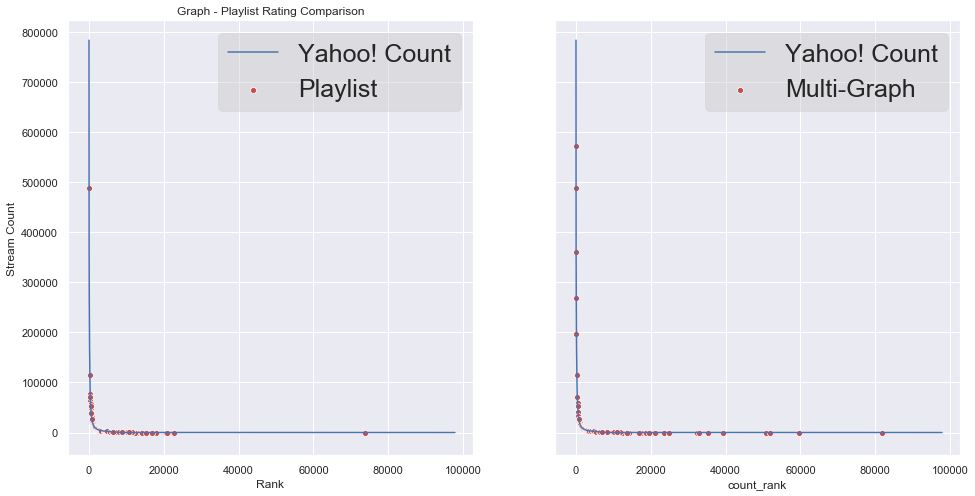

In [53]:
count_fig, (cf_ax1, cf_ax2) = plt.subplots(1,
                                           2,
                                           sharex = 'all',
                                           sharey = 'all',
                                           figsize = (16,8))
sns.lineplot(x = 'count_rank',
            y = 'yahoo_rating_count',
            data = ratings,
            ax = cf_ax1)

sns.lineplot(x = 'count_rank',
            y = 'yahoo_rating_count',
            data = ratings,
            ax = cf_ax2)

sns.relplot(x = 'count_rank',
            y = 'yahoo_rating_count',
            data = playlist_artists,
            color = 'r',
            ax = cf_ax1)

sns.relplot(x = 'count_rank',
            y = 'yahoo_rating_count',
            data = graph_artists,
            color = 'r',
            
            ax = cf_ax2)

cf_ax1.legend(['Yahoo! Count','Playlist'],
             fontsize = 25,
             facecolor = '0.75',  # grey face color
             framealpha = .35)

cf_ax2.legend(['Yahoo! Count','Multi-Graph'],
             fontsize = 25,
             facecolor = '0.75',  # grey face color
             framealpha = .35)


cf_ax1.set(xlabel = 'Rank',
          ylabel = 'Stream Count',
          title ='Graph - Playlist Rating Comparison')
          #ylim = (0,250000))


plt.close(2)
plt.close(3)

plt.show()

In [54]:
print(len(set(artists)),' unique artists in the playlist')
print(len(playlist_artists), ' artists from the playlist in the Yahoo! ratings data')
print(len(graph_artists), ' artists from the multigraph in the Yahoo! ratings data data')


180  unique artists in the playlist
128  artists from the playlist in the Yahoo! ratings data
109  artists from the multigraph in the Yahoo! ratings data data


311
81


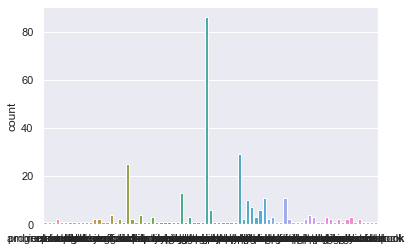

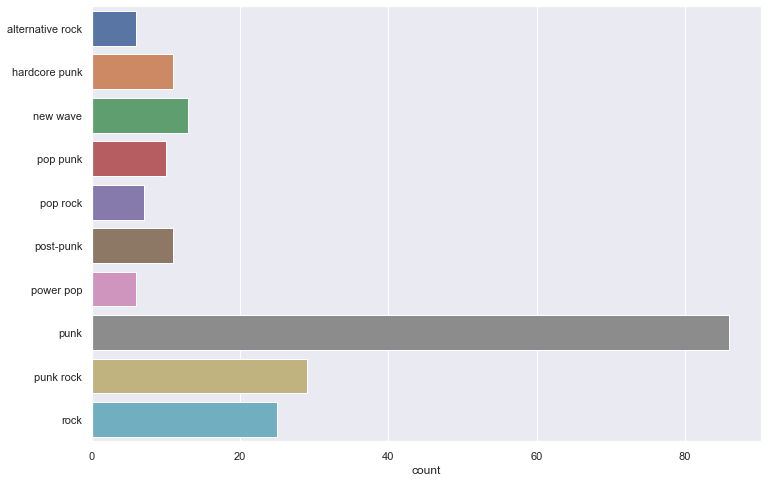

In [58]:
# playlist Tag distribution

artists = playlist_artists['artist']

tag_dist = {group:filtered_tags_dictionary[group] for group in artists if group\
            in filtered_tags_dictionary.keys()}

tag_list = []

for key, value in tag_dist.items():  # Build a list of all tags.
    for tag in value:
        tag_list.append(tag)

print(len(tag_list))

print(len(set(tag_list)))

sns.countplot(tag_list)
plt.show()

new_tag_list = []

tag_count = dict(Counter(tag_list))

short_tag_list = [tag for tag in tag_count if tag_count[tag] >= 5]

for key, value in tag_dist.items():  # build new list of tags that appear 15 or more times
    for tag in value:
        if tag in short_tag_list:
            new_tag_list.append(tag)
            
new_tag_list = sorted(new_tag_list)  # Sorted so tags appear in alphabetical order once plotted.

tag_fig, tag_ax = plt.subplots(figsize = (12,8))

sns.countplot(y = new_tag_list,
              ax = tag_ax)

plt.show()

In [56]:
# turn the tag list into a dict of tag:count(tag)

hist = {}
for i in new_tag_list:
    if i not in hist:
        hist[i] = 1
    else:
        hist[i] += 1

hist

{'alternative rock': 6,
 'hardcore punk': 11,
 'new wave': 13,
 'pop punk': 10,
 'pop rock': 7,
 'post-punk': 11,
 'power pop': 6,
 'punk': 86,
 'punk rock': 29,
 'rock': 25}

In [57]:
total = 0

for key, value in hist.items():
    ent = value * np.log10(value)
    total += ent
    
print('diversity score =', total)

diversity score = 306.3703129009909


295
101


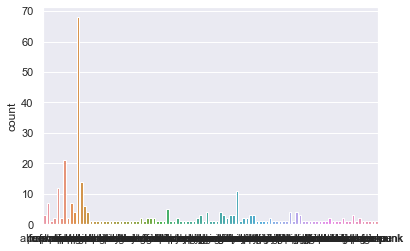

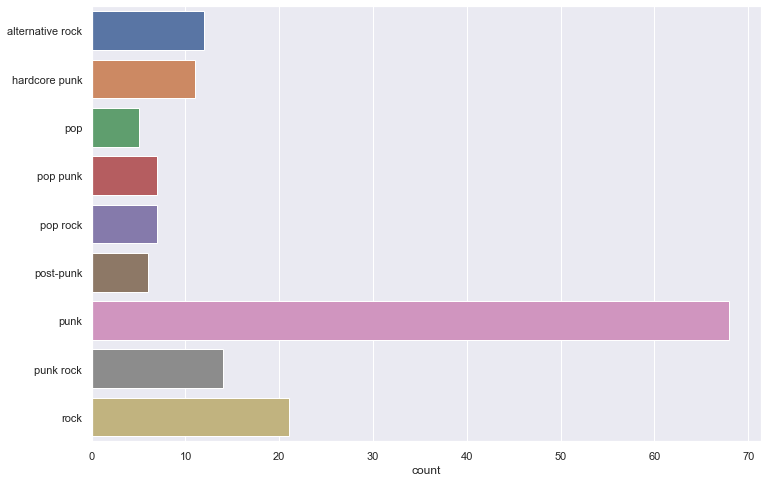

In [59]:
# graph Tag distribution

artists = graph_artists['artist']

tag_dist = {group:filtered_tags_dictionary[group] for group in artists if group\
            in filtered_tags_dictionary.keys()}

tag_list = []

for key, value in tag_dist.items():  # Build a list of all tags.
    for tag in value:
        tag_list.append(tag)

print(len(tag_list))

print(len(set(tag_list)))

sns.countplot(tag_list)
plt.show()

new_tag_list = []

tag_count = dict(Counter(tag_list))

short_tag_list = [tag for tag in tag_count if tag_count[tag] >= 5]

for key, value in tag_dist.items():  # build new list of tags that appear 15 or more times
    for tag in value:
        if tag in short_tag_list:
            new_tag_list.append(tag)
            
new_tag_list = sorted(new_tag_list)  # Sorted so tags appear in alphabetical order once plotted.

tag_fig, tag_ax = plt.subplots(figsize = (12,8))

sns.countplot(y = new_tag_list,
              ax = tag_ax)

plt.show()

In [63]:
test_artists = pd.DataFrame()
pa  = list(playlist_artists['artist'])
ga = list(graph_artists['artist'])
print(len(pa))
print(len(ga))

128
109


In [64]:
for i in np.arange(109,128,1):
    ga.append(0)
print(len(pa))
print(len(ga))


test_artists['graph_artists'] = ga
test_artists['playlist_artists'] = pa

test_artists

#test_artists.to_csv('test_artists.csv')

128
128


,graph_artists,playlist_artists
0,red hot chili peppers,various artists
1,the offspring,the boys
2,pearl jam,death
3,various artists,reagan youth
4,common rider,x
...,...,...
123,0,betty blowtorch
124,0,randy
125,0,the lurkers
126,0,u.s. bombs


### Importing spotify popularity scores for all artists in the playlists and all artists in graphs 

In [66]:
spotscores = pd.read_csv('playlist_graph_artists_scores.csv')
spotscores.head()

,Unnamed: 0,graph_artists,playlist_artists,graph_ID,graph_pop,playlist_ID,playlist_pop
0,0,the beatles,stevie wonder,3WrFJ7ztbogyGnTHbHJFl2,89.0,7guDJrEfX3qb6FEbdPA5qi,79
1,1,the beach boys,the beatles,3oDbviiivRWhXwIE8hxkVV,75.0,3WrFJ7ztbogyGnTHbHJFl2,89
2,2,the nashville a-team,marvin gaye,0,0.0,3koiLjNrgRTNbOwViDipeA,76
3,3,jamiroquai,elton john,6J7biCazzYhU3gM9j1wfid,69.0,3PhoLpVuITZKcymswpck5b,84
4,4,coldplay,the rolling stones,4gzpq5DPGxSnKTe4SA8HAU,88.0,22bE4uQ6baNwSHPVcDxLCe,82


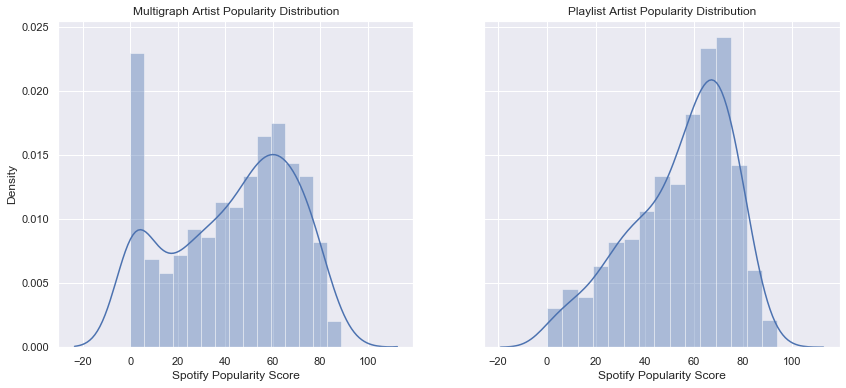

In [67]:
count_fig, (ax1, ax2) = plt.subplots(1,
                                           2,
                                           #sharex = 'all',
                                           sharey = 'all',
                                           figsize = (14,6))

sns.distplot(spotscores['graph_pop'], bins = 15, ax = ax1)
sns.distplot(spotscores['playlist_pop'], bins = 15, ax = ax2)
ax1.set(xlabel = 'Spotify Popularity Score', ylabel = 'Density',title = 'Multigraph Artist Popularity Distribution')
ax2.set(xlabel = 'Spotify Popularity Score', title = 'Playlist Artist Popularity Distribution')

plt.show()